In [1]:
import csv, pandas as pd, numpy as np, matplotlib.pyplot as plt 
from collections import Counter 

def read_in_accidents():
    
    '''This function opens the csv of all national hunting accidents 
    between 2010 and 2021 and reads them into a list.'''

    
    #open the csv and put records into a dictionary 
    with open('hunter_incidents_db_all.csv', 'r',encoding='utf-8') as hrsi_csv:

        reader=csv.DictReader(hrsi_csv)
    
    #create empty list to which dicts will be added
        accident_list=[]
        #use loop to put each record into a list 
        for record in reader:
            try:
                accident_list.append(record)
            except UnicodeDecodeError:
                continue 
    #return the list         
    return accident_list
        


In [2]:
def accident_counter(state):
    
    try:
        
        '''This fucntion takes in the accident list state to be counted '''
    
    #pass in the list of accidents
        accidents=read_in_accidents()
    
    #create empty list to hold occurences. List must be used 
    # if going to use counter dictionary to count occurences
        countaccident=[]
    #put each occurence of the state and years into a list so they can be passed to Counter dict
        for dic in accidents:
            #match dictionary key to variable/user input to select correct state
            if dic['State']==state:
            
                countaccident.append(dic['State'])
                countaccident.append(dic['Year'])

    #count the accidents by passing the list to counter dict
        count_accidents=(Counter(countaccident))
        #sort the dict by year 
        sortdict={key: val for key, val in sorted(count_accidents.items())}
        #pass the dict to a dataframe 
        df=pd.DataFrame.from_dict(sortdict, orient='index')
        #add column name
        df.columns=['Hunting Accidents']
        #change the index that was the state name to the total, as that's what the value represents
        df.rename(index={state:'Total'}, inplace=True)
        return df
    except ValueError:
        print()
        
accident_counter('Kentucky')

In [3]:
def user_input():
    
    
    '''This function gets the state for which the user wants hunting data.The input is then
    used to test a dictionary for said state, and returns that state's abbreviation (the value
    of the dictionary)'''
    
    userinput=input('Enter a state name: ')
    
    
    #use dictionary of state names and abbreviations 
    state_dict =  {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI"}
 
    #test dictionary for user input 
    if userinput in state_dict.keys():
        #return the state full name and its abbreviation 
        return userinput, state_dict[userinput]
    else:
        print('State not found.')
           
#user_input()
    




In [4]:
def read_hunt_license(csv_name):
    
    '''This function reads the csv of hunting license data and puts it into a list and then
    a dataframe.The parameter variable represents the year of hunting license data to be gathered.'''
    
    #open csv 
    with open(csv_name,'r') as huntlic:
            
            reader=csv.reader(huntlic)
        #put into list as CSVs differ annually, even in later years
        #List will 'standardize' certain indicies 
            mainlist=[]
          
            for record in reader:
                #print(record)
                mainlist.append(record)
            #turn list to datframe
            df=pd.DataFrame(mainlist)
            
    return df
    


In [5]:
def read_hunting_license_early():
    
    '''This function takes in the csv of license data from 2015 to 2004. The data
    is in one csv.'''
    
    #read in csv 
    df=pd.read_csv('hunting_license_2004_2015.csv')
    
    #create variable to control the loop 
    index_var=0
    
    #divide csv of 12 years into individual years (individual dataframes)
    #this produces a list of dataframes 
    splitdf=np.array_split(df,12)
    
    #unpack the list of dataframes and give each the same column names for consistent locating
    for item in splitdf:
        splitdf[index_var].columns=[0,1,2,3,4,5,6]
        index_var+=1

    index_var=0
    #give all dfs the same index 
    for item in splitdf:
        splitdf[index_var]=splitdf[index_var].reset_index()
        #delete the new column (index) that gets created 
        del splitdf[index_var]['index']
        index_var+=1
     
    #print(splitdf[0])
    #return dataframes for years 2015-2010 to match accident data
    return splitdf[0],splitdf[1],splitdf[2],splitdf[3],splitdf[4],splitdf[5]

#read_hunting_license_early()    
    

In [6]:
def extract_early_license_data(dataf, abbrev):
    
    '''This takes in a dataframe of license data, and a state abbreviation to identify the state.
    It extracts the year, state, and total number of licenses.'''
    
    #take in dataframe
    df=dataf
    
    
    #access the indicies of the dataframe
    index=df.index
    
    #test column for the state abbreviation 
    condition=df[0]==abbrev
    
    #pass the abbreviation to the indicies of the dataframe to get a specific row number
    state=index[condition]
    
    #unpack index object to isolate the acutal index number
    for item in state:
        stateindex=item

    #get value of the state's total number of licenses
    totallicenses=df.iat[stateindex,4]
    
    #remove comma so number can be plotted 
    totallicenses=int(totallicenses.replace(',',''))
    
    #create list of years 
    years=['2010', '2011', '2012', '2013', '2014', '2015']
    
    #get row index that contains the year of the data
    yearid=df.loc[df[1].isin(years)]
    yearindex=yearid.index[0]
    
    #use row index to locate and extract the year number
    yearind=df.iat[yearindex, 1]

    
    #put license data into dictionary 
    hunt_lic_dict={'Year':yearind, 'State':abbrev, 'Licenses, Tags, Permits, Stamps':totallicenses}
    
    #pass the dictionary to dataframe
    return pd.DataFrame.from_dict(hunt_lic_dict, orient='index')

#extract_early_license_data(df2, 'PA')

In [7]:
def extract_license_data(csv_name,abbrev):
    
    '''This function takes in an individual csv of license data, extracts the state, 
    year, and total licenses and puts it in a dataframe.'''
   
    #pass in dataframe
    df=read_hunt_license(csv_name)
    
   
    #access the indicies 
    index=df.index
   
    #test the column for state abbreviation
    condition=df[0]==abbrev
    
    #get an index object
    state=index[condition]
    
    #unpack the object to get the acutal index number 
    for item in state:
        stateindex=item
   
    #get row number of the appropriate state and use that to get the total number of licenses
    #as they are in the same row 
    totallicenses=df.iat[stateindex,4]
    
    #remove commma character so number can be plotted
    totallicenses=int(totallicenses.replace(',',''))
    
    #get year 
    year=df.iat[2,0].split()[2]
 
    
    #put license data into dictionary 
    hunt_lic_dict={'Year':year, 'State':abbrev, 'Licenses, Tags, Permits, Stamps':
                   totallicenses}
    
    #return dataframe
    return pd.DataFrame.from_dict(hunt_lic_dict, orient='index')

#extract_license_data('hunting_license_2021.csv','PA')

In [8]:
def combine_license_data(abbrev):
    
    '''This function calls the function that extracts license data that was locked up in 
    the csv of combined years by taking in the data frame that was split 
    from the list of dataframes. It also calls the function the extracts license data from 
    the years that were individual csvs. It takes in the state abbreviation as well.'''
    
    #get license data from the dataframe for 2010-2015
    df10=extract_early_license_data(df5,abbrev)
    
    df11=extract_early_license_data(df4,abbrev)
  
    df12=extract_early_license_data(df3,abbrev)
   
    df13=extract_early_license_data(df2,abbrev)
 
    df14=extract_early_license_data(df1,abbrev)
    
    df15=extract_early_license_data(df0,abbrev)
    
    #get license data from the latter years 
    df16=extract_license_data('hunting_license_2016.csv',abbrev)
  
    df17=extract_license_data('hunting_license_2017.csv',abbrev)
   
    df18=extract_license_data('hunting_license_2018.csv',abbrev)
    
    df19=extract_license_data('hunting_license_2019.csv',abbrev)
   
    df20=extract_license_data('hunting_license_2020.csv',abbrev)
   
    df21=extract_license_data('hunting_license_2021.csv',abbrev)
   
    
    
    #join all dataframe into a single df for license data spanning 2010-2021
    return pd.concat([df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21],axis=1 )
    
#combine_license_data('PA')


In [9]:
def join_accident_licenses(name):
    
      
    try:
        
        #take in accident DF and license DF
        accidents=accident_counter(name)
        licenses=combine_license_data(abbrev).T
    
        #accidents.reset_index()
        
        #make the year column the indicies 
        licenses=licenses.set_index('Year')
        #remove the text 'Year' from the indicies 
        licenses.index.names=[None]
        #add the accident series to the license dataframe
        licenses['Accidents']=accidents['Hunting Accidents']
       
        #return full dataframe 
        return licenses
    except AttributeError:
        print()
    
#join_accident_licenses('Pennsylvania')

In [10]:
def plot():
    
    '''This function takes in the complete dataframe and plots it to scatterplot.'''
    try:
        
        #take in the dataframe
        df=join_accident_licenses(name)
    
        #plot the data
        df.plot.scatter(x='Licenses, Tags, Permits, Stamps', y='Accidents', title='Hunting Accidents vs. Hunting '\
        'Licenses')
    except:
        print('No Data Found.')

      
    


In [11]:
def accident_rate():
    
    '''this function takes in the full dataframe of licenses and accidents and calculates
    the average rate of accidents over the time period.'''
    
    #take in full dataframe:
    fulldf=join_accident_licenses(name)
    
    #drop empty rows 
    fulldf=fulldf.dropna()
    #get accident average
    accidentavg=fulldf['Accidents'].mean()
    #get hunting event average
    hunting_event_avg=fulldf['Licenses, Tags, Permits, Stamps'].mean()
    #calculate rate and format number 
    accident_rate=accidentavg/hunting_event_avg
    accident_rate=format(accident_rate,".6f")+'.'
    #display result 
    print('The average accident rate (number of accidents per hunting event) in', \
          name,'is',accident_rate)

    
    

Enter a state name: Ohio
The average accident rate (number of accidents per hunting event) in Ohio is 0.000017.


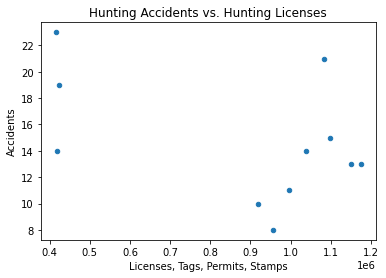

In [22]:

name, abbrev=user_input()

df0,df1,df2,df3,df4,df5=read_hunting_license_early()

plot()

accident_rate()
